### Motivation:

Power grids are systems where the demand-supply chain has to be maintained always between the generation of power, and the demand for power from the users to operate power grids without interruptions. Although protective measures are in place, power grids are prone to cascading failures.  Cascading failures in the power grids are scenarios where a small disturbance in the power grid can create a domino effect due to an imbalance sudden between demand-supply. The number of people getting affected by these events and the economic loss is astronomical. For example, the cascading failures in 2003 in the North-East affected more than 55 million people and the economic impact was in the billions.  From 1965 to 2008, there were nine massive blackout events affecting more than 20 million people whereas in the last decade there were seven massive blackouts including the largest one in India [1].  In this project I will use a dataset that i have developed [2] earlier  to model cascading failures in power grid.




### Summary of the project obsjective:
This project is a domain-specific research project and will answer the following  problems:

- First, perform exploratory data analysis to find the patterns in data, for example observing the role of various features like load-shedding, human error, etc. on cascading failure. 
- Using regression techniques to find the effect of cascading failures due to various initiating disturbance conditions when cascading ends.
- Use classification techniques to identify the critical (leads to cascading failure) and non-critical (does not lead to cascading failure) initiating feature values.
- Do a comparison between various machine learning algorithms, do hyperparameter tuning where necessary.

### Dataset: 
I have developed the  cascading failures simulated dataset using my Cascading failure simulation (CFS) framework developed in Matlab.   It has more than 60000 simulations of cascading failures. The dataset contains 17 features and 2 target variables (total failed lines, Loadshed). 

Reference:
1. https://en.wikipedia.org/wiki/List_of_major_power_outages
2. Rezoan A. Shuvro, Mitun Talukder, Pankaz Das, Majeed M. Hayat, “Predicting Cascading Failures in Power Grids using Machine Learning Algorithms”, North American Power Symposium (NAPS’2019)




-  Importing the libraries and loading the .csv file in a dataframe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the dataset
dataset = pd.read_csv('CFS_dataset.csv')

- head of the data set

In [3]:
dataset.head(5)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.50,768,0,2.675,7.397,1550,6307,6307,8970.0,2663.0,0.50,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.20,209,0,2.699,6.912,450,2934,2934,8471.0,5537.0,0.50,5538.0,0.2,48
2,7,17,200,100,0.40,0.75,0.01,537,0,2.663,6.951,1050,700,700,7475.0,6775.0,0.50,6774.0,0.2,10
3,9,9,200,50,0.30,0.90,0.05,526,0,2.638,7.048,850,1507,1507,8970.0,7463.0,0.29,7462.0,0.2,0
4,3,82,200,50,0.05,0.85,0.35,149,0,2.712,6.855,300,3534,3534,8471.0,4937.0,0.72,4937.0,0.2,79


-  Tail of the dataset to check the size is okay

In [4]:
dataset.tail(2)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
66815,10,56,100,50,0.70,0.7,0.15,481,0,2.625767,6.960539,900,2380,2380,6976.34,4596.34,0.091743,4595.900659,0.10,46
66816,5,47,200,100,0.55,0.6,0.20,499,0,2.687117,6.827160,800,1574,1574,5979.72,4405.72,0.168067,4405.717426,0.01,42


- Load shed is available twice in the dataset. So, i will drop that column.

In [5]:
#columns of the dataset
dataset.columns

Index(['initially failed lines', 'failed lines after cascade', 'Cmax', 'Cmin',
       'loadshedding constraint', 'loading ratio', 'capacity estimation error',
       'flow capacity', 'Island?', 'degree', 'distance', 'installed cap',
       'Load shedd', 'Load shedd.1', 'demand', 'served', 'HEP', 'generated',
       'Alpha', 'failed lines due to cascade'],
      dtype='object')

- The dataset column names are not consistent. So, i need to rename them to avoid inconsistensy

In [6]:
dataset.rename(columns={'initially failed lines': ' Intial failed lines', 
                       'failed lines after cascade':'Failed lines after cascade ends',
                        'loadshedding constraint': 'Load-shedding constraint',
                        'loading ratio': 'load-demand ratio',
                        'capacity estimation error':'Capacity estimation error',
                        'flow capacity':'Flow capacity','degree':'Degree', 'distance':'Distance',
                        'installed cap':'Installed capacity',
        'demand':'Demand', 'served':'Served', 'HEP':'Human error Probability', 'generated':'Generation',
        'failed lines due to cascade':'Failed lines due to cascade'
                       },inplace=True)

In [7]:
# shape of the dataset
dataset.shape

(66817, 20)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66817 entries, 0 to 66816
Data columns (total 20 columns):
 Intial failed lines               66817 non-null int64
Failed lines after cascade ends    66817 non-null int64
Cmax                               66817 non-null int64
Cmin                               66817 non-null int64
Load-shedding constraint           66817 non-null float64
load-demand ratio                  66817 non-null float64
Capacity estimation error          66817 non-null float64
Flow capacity                      66817 non-null int64
Island?                            66817 non-null int64
Degree                             66817 non-null float64
Distance                           66817 non-null float64
Installed capacity                 66817 non-null int64
Load shedd                         66817 non-null int64
Load shedd.1                       66817 non-null int64
Demand                             66817 non-null float64
Served                             6681

Since the data-set was generated from simulation, there should be no missing values in the dataset. We can confirm from above that there are no missing values in the dataset.

### Data cleaing and wranling 

- Load shedd and Load shedd.1 are same so remove Load shedd.1 

In [9]:
dataset.drop('Load shedd.1',axis=1,inplace=True)

In [10]:
# renaming Load shedd
dataset.rename(columns={'Load shedd':'Loadshed'},inplace=True)
dataset.head(2)

,Intial failed lines,Failed lines after cascade ends,Cmax,Cmin,Load-shedding constraint,load-demand ratio,Capacity estimation error,Flow capacity,Island?,Degree,Distance,Installed capacity,Loadshed,Demand,Served,Human error Probability,Generation,Alpha,Failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.5,768,0,2.675,7.397,1550,6307,8970.0,2663.0,0.5,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.2,209,0,2.699,6.912,450,2934,8471.0,5537.0,0.5,5538.0,0.2,48


Now, i will check the summary statistic and the correlation between variables to check if there is any inconsistency

In [11]:
dataset_describe = dataset.describe().transpose()

In [12]:
dataset_describe = dataset_describe.drop('count',axis =1)

In [13]:
# round the statistics to 2 decimal points
round (dataset_describe,2)

,mean,std,min,25%,50%,75%,max
Intial failed lines,6.00,2.58,2.00,4.00,6.00,8.00,10.00
Failed lines after cascade ends,42.84,22.54,2.00,27.00,49.00,58.00,104.00
Cmax,197.47,171.80,50.00,100.00,200.00,200.00,800.00
Cmin,65.22,34.97,50.00,50.00,50.00,50.00,800.00
Load-shedding constraint,0.32,0.24,0.01,0.15,0.30,0.50,0.90
load-demand ratio,0.73,0.15,0.50,0.60,0.75,0.85,0.99
Capacity estimation error,0.22,0.15,0.01,0.10,0.20,0.35,0.50
Flow capacity,428.19,257.28,0.00,224.00,391.00,587.00,1895.00
Island?,0.01,0.08,0.00,0.00,0.00,0.00,1.00
Degree,2.67,0.03,2.63,2.65,2.67,2.70,2.74


Now, we need to check whether all the columns of the dataset are relevant. To do that we can check the correlation and heatmap of colleration using seaborn vizialization.


In [14]:
correlation = round(dataset.corr(),2)


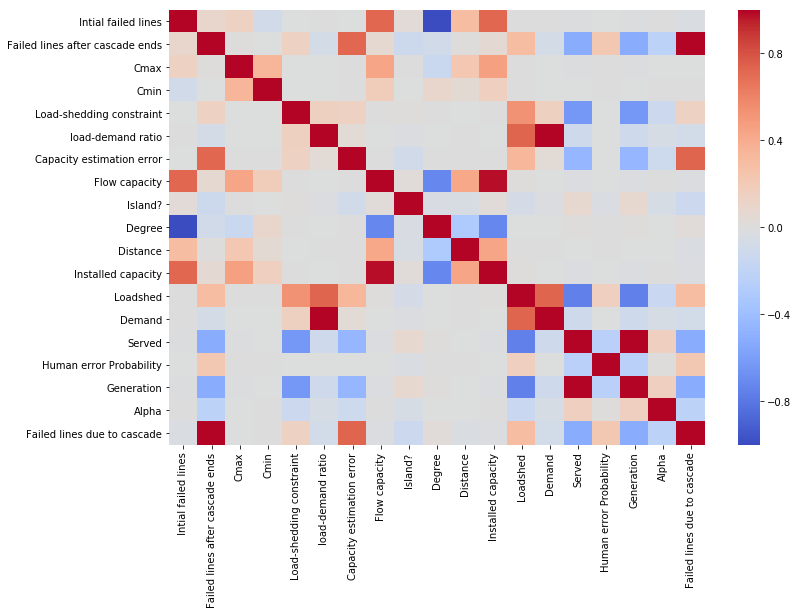

In [15]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

In the dataset, we can do the following column removals:

- loadshed is calculated as the difference between demand and served loads. We need to remove demand and served columns to avoid colinearity. 
- Island colums can be removed as the value_counts are mostly zero and has no correlation with the failed lines due to cascade.  
- We want to predict failed lines due to cascade. So, we should remove failed lines after cascade ends to avoid colinearity.
- Flow capacity through the lines needs to be removed as we want to predict the cascade from installed capacities.


In [16]:
dataset['Island?'].value_counts()

0    66388
1      429
Name: Island?, dtype: int64

In [17]:
dataset.drop(['Island?','Served','Demand','Failed lines after cascade ends','Flow capacity'],axis=1,inplace=True)

- Here, our traget objective is to predict cascading failures. In the dataset, the output variables are Loadshed and Failed lines due to cascade. We define a normalized cascading effect variable as a linear combination of Loadshed and Failed lines due to cascade   

In [18]:
scaler = MinMaxScaler()
Scaled_data = scaler.fit_transform(dataset[['Loadshed','Failed lines due to cascade']])

C:\Users\Rezoan Ahmed\Anaconda5\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


- After normalizing the data, we use linear combination of  Loadshed and Failed lines due to cascade to calculate the casding effect and then insert that into the dataframe.

In [19]:
scaled_df = pd.DataFrame(Scaled_data)
scaled_df['Cascading effect'] = 0.5*scaled_df[0]+0.5*scaled_df[1]
dataset =pd.concat((dataset,scaled_df['Cascading effect']),axis =1)

In [20]:
#Check the head of the dataset again
dataset.head()

,Intial failed lines,Cmax,Cmin,Load-shedding constraint,load-demand ratio,Capacity estimation error,Degree,Distance,Installed capacity,Loadshed,Human error Probability,Generation,Alpha,Failed lines due to cascade,Cascading effect
0,6,200,50,0.45,0.90,0.50,2.675,7.397,1550,6307,0.50,2663.0,0.2,80,0.736267
1,4,200,100,0.05,0.85,0.20,2.699,6.912,450,2934,0.50,5538.0,0.2,48,0.398677
2,7,200,100,0.40,0.75,0.01,2.663,6.951,1050,700,0.50,6774.0,0.2,10,0.087555
3,9,200,50,0.30,0.90,0.05,2.638,7.048,850,1507,0.29,7462.0,0.2,0,0.076366
4,3,200,50,0.05,0.85,0.35,2.712,6.855,300,3534,0.72,4937.0,0.2,79,0.590540


- Updated heatmap plot after removing unwanted columns

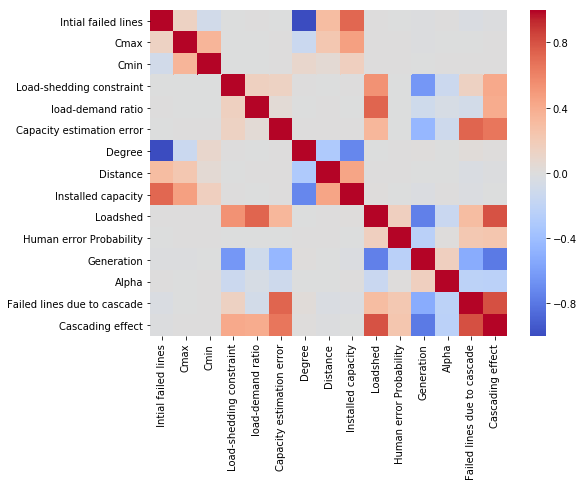

In [21]:
plt.subplots(figsize=(8,6))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

In [22]:
dataset.rename(columns ={'Cascading effect':'Cascading_effect'},inplace = True)

- Checking the histogram of the cascading effect. It can be observed that the histogram looks bimodal.

Text(0.5, 1.0, 'Histogram of cascading effect')

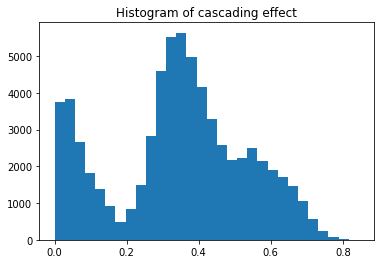

In [27]:
plt.hist(dataset.Cascading_effect, bins =30)
plt.title('Histogram of cascading effect')